<a href="https://colab.research.google.com/github/ashishpatel26/Ganpat-STTP-on-Data-Analytics-with-Python/blob/main/Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd                 # used for data manipulation
import numpy as np                  # used for numeric computation or algebric operation
import seaborn as sns               # used for graph
import matplotlib.pyplot as plt     # used for graph
import os                           # control system level task
plt.style.use('seaborn-colorblind') # used for select the graph design
# used for print inline graph  
%matplotlib inline                  

### Data Reading

In [2]:
# 1. Read the dataset

# 1.1 Select the number of columns to display
use_cols = ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp','Survived']

# 1.2 Read the dataset
titanic = pd.read_csv("https://raw.githubusercontent.com/ashishpatel26/Amazing-Feature-Engineering/master/data/titanic.csv", usecols=use_cols)

# 1.3 Display first five row for dataset
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.0,1,7.2500
1,1,1,female,38.0,1,71.2833
2,1,3,female,26.0,0,7.9250
3,1,1,female,35.0,1,53.1000
4,0,3,male,35.0,0,8.0500


In [3]:
# 2. Print the shape of the dataset
print(f"Total Rows : {titanic.shape[0]} Columns : {titanic.shape[1]}")

Total Rows : 891 Columns : 6


### Missing Value Checking

In [4]:
# 3. Generate the missing value and its Proportion values
# only variable Age has missing values, totally 177 cases
result = pd.concat([titanic.isnull().sum(), titanic.isnull().mean()], axis=1)
result = result.rename(index = str, columns = {0:'Total Missing', 1:'Proportion'})
result

,Total Missing,Proportion
Survived,0,0.000000
Pclass,0,0.000000
Sex,0,0.000000
Age,177,0.198653
SibSp,0,0.000000
Fare,0,0.000000


## Missing Value Handling Methods

### **1. List wise Deletion :** 
a strategy for dealing with the problem of missing data in which an entire case record is excluded from statistical analysis if values are found to be missing for any variable of interest.

![](https://d35fo82fjcw0y8.cloudfront.net/2016/03/03210603/listwise-deletion.jpg)

In [5]:
# 4. List wise Deletion

titanic_copy = titanic.copy(deep=True)                         # Generate the shallow copy

# 4.1 Before List wise Deletion dataset
print(f"Before List wise Deletion Total Rows : {titanic_copy.shape[0]} Columns : {titanic_copy.shape[1]}")
b_rows = titanic_copy.shape[0]
display(titanic[titanic_copy["Age"].isnull()])

# 4.2 After List wise Deletion dataset
titanic_copy = titanic_copy.dropna(axis=0,inplace=False)    # list wise deletion operation
print(f"After List wise Deletion Total Rows : {titanic_copy.shape[0]} Columns : {titanic_copy.shape[1]}")
a_rows = titanic_copy.shape[0]
print(f"Total Rows Deleted : {b_rows-a_rows}")

# 4.3 Display the data after list wise deletion
if titanic_copy["Age"].isnull().sum() > 0:
  display(titanic[titanic_copy["Age"].isnull()])
else:
  print("All NA rows are deleted")

Before List wise Deletion Total Rows : 891 Columns : 6


,Survived,Pclass,Sex,Age,SibSp,Fare
5,0,3,male,NaN,0,8.4583
17,1,2,male,NaN,0,13.0000
19,1,3,female,NaN,0,7.2250
26,0,3,male,NaN,0,7.2250
28,1,3,female,NaN,0,7.8792
...,...,...,...,...,...,...
859,0,3,male,NaN,0,7.2292
863,0,3,female,NaN,8,69.5500
868,0,3,male,NaN,0,9.5000
878,0,3,male,NaN,0,7.8958


After List wise Deletion Total Rows : 714 Columns : 6
Total Rows Deleted : 177
All NA rows are deleted


### **2. Mean Median Mode Imputation :** 
Mean/median imputation consists of replacing all occurrences of missing values (NA) within a variable by the mean or median.
> Note : **When to use mean/median imputation?** :  
*Data is missing completely at random. No more than 5% of the variable contains missing data.*

![](https://miro.medium.com/max/1838/1*b5JhYgFXJVJJaLlDs9dSEw.png) ![](https://miro.medium.com/max/875/1*zQelKaI6hXWq0Tkd5rqUAg.png) ![](https://miro.medium.com/max/875/1*qoL0cpQ-CzQ6GhD-sKEVTA.png)

In [6]:
# 5. Mean Median Mode Imputation
titanic_copy = titanic.copy(deep=True)
print('-'*80)
print(f"Age Mean: {titanic_copy['Age'].mean()}\tAge Median : {titanic_copy['Age'].median()}\tAge Median : {titanic_copy['Age'].mode()[0]}")
print('-'*80)

# 5.1 Impute the Missing value through Mean
titanic_copy['Age_impute_mean'] = titanic_copy['Age'].fillna(titanic_copy['Age'].mean())

# 5.2 Result of Missing value
titanic_copy[titanic_copy["Age"].isnull()][['Age','Age_impute_mean']]

--------------------------------------------------------------------------------
Age Mean: 29.69911764705882	Age Median : 28.0	Age Median : 24.0
--------------------------------------------------------------------------------


,Age,Age_impute_mean
5,NaN,29.699118
17,NaN,29.699118
19,NaN,29.699118
26,NaN,29.699118
28,NaN,29.699118
...,...,...
859,NaN,29.699118
863,NaN,29.699118
868,NaN,29.699118
878,NaN,29.699118


In [7]:
# 5.3 Impute the Missing value through Median
titanic_copy = titanic.copy(deep=True)
titanic_copy['Age_impute_median'] = titanic_copy['Age'].fillna(titanic_copy['Age'].median())

# 5.4 Result of Missing value
titanic_copy[titanic_copy["Age"].isnull()][['Age','Age_impute_median']]

,Age,Age_impute_median
5,NaN,28.0
17,NaN,28.0
19,NaN,28.0
26,NaN,28.0
28,NaN,28.0
...,...,...
859,NaN,28.0
863,NaN,28.0
868,NaN,28.0
878,NaN,28.0


In [8]:
# 5.5 Impute the Missing value through Median
titanic_copy = titanic.copy(deep=True)
titanic_copy['Age_impute_mode'] = titanic_copy['Age'].fillna(titanic_copy['Age'].mode()[0])

# 5.6 Result of Missing value
titanic_copy[titanic_copy["Age"].isnull()][['Age','Age_impute_mode']]

,Age,Age_impute_mode
5,NaN,24.0
17,NaN,24.0
19,NaN,24.0
26,NaN,24.0
28,NaN,24.0
...,...,...
859,NaN,24.0
863,NaN,24.0
868,NaN,24.0
878,NaN,24.0


### **3. End of the Distribution Imputation :** 
If there is suspicion that the missing value is not at random then capturing that information is important. In this scenario, one would want to replace missing data with values that are at the tails of the distribution of the variable.

$$ Distribution\ Imputation = \mu + 3 \sigma $$

![](http://www.mathandstatistics.com/wp-content/uploads/2014/06/Example1EmpiricalGraphNormal.jpg)

In [9]:
# 6. End of the distribution imputation
titanic_copy = titanic.copy(deep=True)
print(f"Distribution Imputation of Age is : {titanic_copy['Age'].mean() + 3 * titanic_copy['Age'].std()}")
# 6.1 End of the distribution imputation
titanic_copy['Age_dist_imp'] = titanic_copy['Age'].fillna(titanic_copy['Age'].mean() + 3 * titanic_copy['Age'].std())

# 5.6 Result of Missing value
titanic_copy[titanic_copy["Age"].isnull()][['Age','Age_dist_imp']]

Distribution Imputation of Age is : 73.27860964406095


,Age,Age_dist_imp
5,NaN,73.27861
17,NaN,73.27861
19,NaN,73.27861
26,NaN,73.27861
28,NaN,73.27861
...,...,...
859,NaN,73.27861
863,NaN,73.27861
868,NaN,73.27861
878,NaN,73.27861


### **4. Random Imputation :** 
replacing the NA by taking a random value from the pool of available observations of that variable

In [10]:
# 7. Random Imputation
titanic_copy = titanic.copy(deep=True)

titanic_copy['Age_random'] = titanic_copy["Age"]

# 7.1 extract the random sample to fill the na
random_sample = titanic_copy['Age'].dropna().sample(titanic_copy['Age'].isnull().sum(), random_state=42)

random_sample.index = titanic_copy[titanic_copy['Age'].isnull()].index

titanic_copy.loc[titanic_copy['Age'].isnull(), 'Age_random'] = random_sample

# 7.2 Result of Missing value
titanic_copy[titanic_copy["Age"].isnull()][['Age','Age_random']]

,Age,Age_random
5,NaN,42.0
17,NaN,3.0
19,NaN,29.0
26,NaN,24.0
28,NaN,43.0
...,...,...
859,NaN,18.0
863,NaN,24.0
868,NaN,4.0
878,NaN,22.0


## **Outliers :**
* A value that **"lies outside"** (is much smaller or larger than) most of the other values in a set of data. 
* For example in the scores **25,29,3,32,85,33,27,28** both **3 and 85** are **"outliers"**.

![](https://miro.medium.com/max/697/1*O3lOgPwuHP7Vfc1T6NDRrQ.png)

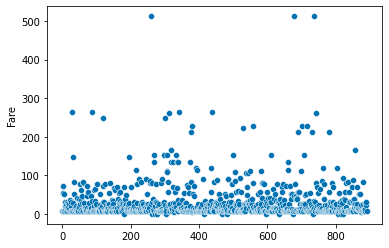

In [11]:
sns.scatterplot(x = titanic_copy.index, y = titanic_copy["Fare"])
plt.show()

## Outlier Detection Method

### **1.Detect by arbitrary boundary**
* identify outliers based on arbitrary boundaries

In [12]:
titanic_copy = titanic.copy(deep=True)
u_b = 300
l_b = 5
para = (u_b, l_b)
tmp = pd.concat([titanic_copy["Fare"]>u_b,titanic_copy["Fare"]<l_b],axis=1)
outlier_index = tmp.any(axis=1)
print('Num of outlier detected:',outlier_index.value_counts()[1])
print('Proportion of outlier detected',outlier_index.value_counts()[1]/len(outlier_index)) 
print('Upper bound:',para[0],'\nLower bound:',para[1])

# check the 19 found outliers
titanic_copy.loc[outlier_index,'Fare'].sort_values().to_frame().T

Num of outlier detected: 19
Proportion of outlier detected 0.02132435465768799
Upper bound: 300 
Lower bound: 5


,179,806,732,674,633,597,815,466,481,302,277,271,263,413,822,378,679,737,258
Fare,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0125,512.3292,512.3292,512.3292


### **2.IQR method**
* outlier detection by Interquartile Ranges Rule
![](https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png)

In [13]:
titanic_copy = titanic.copy(deep=True)
col = "Fare"
threshold = 5

IQR = titanic_copy[col].quantile(0.75) - titanic_copy[col].quantile(0.25)

Lower_fence = titanic_copy[col].quantile(0.25) - (IQR * threshold)
Upper_fence = titanic_copy[col].quantile(0.75) + (IQR * threshold)
para = (Upper_fence, Lower_fence)

tmp = pd.concat([titanic_copy[col]>Upper_fence,titanic_copy[col]<Lower_fence],axis=1)
outlier_index = tmp.any(axis=1)

print('Num of outlier detected:',outlier_index.value_counts()[1])
print('Proportion of outlier detected',outlier_index.value_counts()[1]/len(outlier_index))

# check the 31 found outliers
titanic_copy.loc[outlier_index,'Fare'].sort_values().to_frame().T

Num of outlier detected: 31
Proportion of outlier detected 0.03479236812570146


,31,195,305,708,297,498,609,332,268,318,856,730,779,689,377,527,700,716,557,380,299,118,311,742,341,88,438,27,679,258,737
Fare,146.5208,146.5208,151.55,151.55,151.55,151.55,153.4625,153.4625,153.4625,164.8667,164.8667,211.3375,211.3375,211.3375,211.5,221.7792,227.525,227.525,227.525,227.525,247.5208,247.5208,262.375,262.375,263.0,263.0,263.0,263.0,512.3292,512.3292,512.3292


### **3.Windsorization**
* top-coding & bottom coding (capping the maximum of a distribution at an arbitrarily set value, vice versa).
* Winsorization is a way to minimize the influence of outliers in your data by either:
    1. Assigning the outlier a lower weight,
    2. Changing the value so that it is close to other values in the set.

In [20]:
# Arbitory outlier detection
titanic_copy = titanic.copy(deep=True)
u_b = 300
l_b = 5
para = (u_b, l_b)
tmp = pd.concat([titanic_copy["Fare"]>u_b,titanic_copy["Fare"]<l_b],axis=1)
outlier_index = tmp.any(axis=1)
print('Num of outlier detected:',outlier_index.value_counts()[1])
print('Proportion of outlier detected',outlier_index.value_counts()[1]/len(outlier_index)) 
print('Upper bound:',para[0],'\nLower bound:',para[1])

# check the 19 found outliers
titanic_copy.loc[outlier_index,'Fare'].sort_values().to_frame().T

Num of outlier detected: 19
Proportion of outlier detected 0.02132435465768799
Upper bound: 300 
Lower bound: 5


,179,806,732,674,633,597,815,466,481,302,277,271,263,413,822,378,679,737,258
Fare,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0125,512.3292,512.3292,512.3292


In [21]:
# see index 258,263,271 have been replaced with top/bottom coding
col = 'Fare'
strategy = 'both'
if strategy == 'both':
    titanic_copy.loc[titanic_copy[col]>para[0],col] = para[0]
    titanic_copy.loc[titanic_copy[col]<para[1],col] = para[1]
elif strategy == 'top':
    titanic_copy.loc[titanic_copy[col]>para[0],col] = para[0]
elif strategy == 'bottom':
    titanic_copy.loc[titanic_copy[col]<para[1],col] = para[1]

titanic_copy[255:275]

,Survived,Pclass,Sex,Age,SibSp,Fare
255,1,3,female,29.0,0,15.2458
256,1,1,female,NaN,0,79.2000
257,1,1,female,30.0,0,86.5000
258,1,1,female,35.0,0,300.0000
259,1,2,female,50.0,0,26.0000
260,0,3,male,NaN,0,7.7500
261,1,3,male,3.0,4,31.3875
262,0,1,male,52.0,1,79.6500
263,0,1,male,40.0,0,5.0000
264,0,3,female,NaN,0,7.7500


## Outlier Handling Methods

### **1.Mean Median Mode Imputation Outlier Method**
* replacing the outlier by mean/median/most frequent values of that variable
* This is similar like we did imputation for missing value we replace outlier value with mean median mode value

In [18]:
# Arbitary Outlier Detection method
titanic_copy = titanic.copy(deep=True)
u_b = 300
l_b = 5
para = (u_b, l_b)
tmp = pd.concat([titanic_copy["Fare"]>u_b,titanic_copy["Fare"]<l_b],axis=1)
outlier_index = tmp.any(axis=1)
print('Num of outlier detected:',outlier_index.value_counts()[1])
print('Proportion of outlier detected',outlier_index.value_counts()[1]/len(outlier_index)) 
print('Upper bound:',para[0],'\nLower bound:',para[1])

# check the 19 found outliers
titanic_copy.loc[outlier_index,'Fare'].sort_values().to_frame().T

Num of outlier detected: 19
Proportion of outlier detected 0.02132435465768799
Upper bound: 300 
Lower bound: 5


,179,806,732,674,633,597,815,466,481,302,277,271,263,413,822,378,679,737,258
Fare,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0125,512.3292,512.3292,512.3292


In [16]:
strategy = "mean"
col = "Fare"
if strategy=='mean':
    titanic_copy.loc[outlier_index,col] = titanic_copy[col].mean()
elif strategy=='median':
    titanic_copy.loc[outlier_index,col] = titanic_copy[col].median()
elif strategy=='mode':
    titanic_copy.loc[outlier_index,col] = titanic_copy[col].mode()[0]

In [19]:
titanic_copy[255:275]

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

## Feature Scaling

### **1.Normalization and Standarization**

**Normalization :** Normalization rescales the values into a range of [0,1]. This might be useful in some cases where all parameters need to have the same positive scale. However, the outliers from the data set are lost.


$$ Z_{Normalization} = \frac{X - X_{min}}{X_{max}-X_{min}}
$$
* Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution.
* Normalization typically means rescales the values into a range of [0,1]. 

**Standardization :**  rescales data to have a mean (μ) of 0 and standard deviation (σ) of 1 (unit variance).

$$ X_{Scaled} = \frac{X - \mu}{\sigma}
$$
* Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution.
* Standardization typically means rescales data to have a mean of 0 and a standard deviation of 1 (unit variance).

In [22]:
titanic.head(3)

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.0,1,7.2500
1,1,1,female,38.0,1,71.2833
2,1,3,female,26.0,0,7.9250


#### **Train Test Split**

![](https://d1m75rqqgidzqn.cloudfront.net/wp-data/2020/07/15185319/blogs-15-7-2020-02-1024x565.jpg)

In [24]:
from sklearn.model_selection import train_test_split
titanic_copy = titanic.copy(deep=True)

# Note that we include target variable in the X_train because we need it to supervise our discretization
# this is not the standard way of using train-test-split

X_train, X_test, y_train, y_test = train_test_split(titanic_copy, titanic_copy.Survived, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((623, 6), (268, 6))

In [26]:
# add the new created feature
from sklearn.preprocessing import StandardScaler
ss = StandardScaler().fit(X_train[['Fare']])
X_train_copy = X_train.copy(deep=True)
X_train_copy['Fare_zscore'] = ss.transform(X_train_copy[['Fare']])
X_train_copy.head(6)

,Survived,Pclass,Sex,Age,SibSp,Fare,Fare_zscore
857,1,1,male,51.0,0,26.5500,-0.122530
52,1,1,female,49.0,1,76.7292,0.918124
386,0,3,male,1.0,5,46.9000,0.299503
124,0,1,male,54.0,0,77.2875,0.929702
578,0,3,female,NaN,1,14.4583,-0.373297
549,1,2,male,8.0,1,36.7500,0.089005


In [27]:
# check if it is with mean=0 std=1
print(X_train_copy['Fare_zscore'].mean())
print(X_train_copy['Fare_zscore'].std())

5.916437306188636e-17
1.0008035356861


### 2.MinMax Scaling

**Min-Max Scaling** – All features end up having the same 
scale, but it does not handle outliers well.
$$ X_{MinMax Scaling} = \frac{X - X_{min}}{X_{max} - X_{min}}$$

In [29]:
# add the new created feature
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler().fit(X_train[['Fare']])
X_train_copy = X_train.copy(deep=True)
X_train_copy['Fare_minmax'] = mms.transform(X_train_copy[['Fare']])
X_train_copy.head(6)

,Survived,Pclass,Sex,Age,SibSp,Fare,Fare_minmax
857,1,1,male,51.0,0,26.5500,0.051822
52,1,1,female,49.0,1,76.7292,0.149765
386,0,3,male,1.0,5,46.9000,0.091543
124,0,1,male,54.0,0,77.2875,0.150855
578,0,3,female,NaN,1,14.4583,0.028221
549,1,2,male,8.0,1,36.7500,0.071731


In [30]:
# check the range of Fare_minmax
print(X_train_copy['Fare_minmax'].max())
print(X_train_copy['Fare_minmax'].min())

1.0
0.0


### **3.Robust scaling**

**Robust scaling** : 
Scale features using statistics that are robust to outliers. This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range).

$$ X_{Scaled} = \frac{X - X_{median}}{IQR}$$

In [32]:
# add the new created feature
from sklearn.preprocessing import RobustScaler
rs = RobustScaler().fit(X_train[['Fare']])
X_train_copy = X_train.copy(deep=True)
X_train_copy['Fare_robust'] = rs.transform(X_train_copy[['Fare']])
X_train_copy.head(6)

,Survived,Pclass,Sex,Age,SibSp,Fare,Fare_robust
857,1,1,male,51.0,0,26.5500,0.492275
52,1,1,female,49.0,1,76.7292,2.630973
386,0,3,male,1.0,5,46.9000,1.359616
124,0,1,male,54.0,0,77.2875,2.654768
578,0,3,female,NaN,1,14.4583,-0.023088
549,1,2,male,8.0,1,36.7500,0.927011


In [34]:
# check the range of Fare_minmax
print(X_train_copy['Fare_robust'].mean())
print(X_train_copy['Fare_robust'].std())

0.7440925967892128
2.056799500684759


## **Feature Encoding**

![](https://miro.medium.com/max/1200/0*T5jaa2othYfXZX9W.)

1. **Label Encoding :**
In label encoding in Python, we replace the categorical value with a numeric value between 0 and the number of classes minus 1. If the categorical variable value contains 5 distinct classes, we use (0, 1, 2, 3, and 4). 


2. **One-Hot Encoding :** 
One hot encoding is one method of converting data to prepare it for an algorithm and get a better prediction. With one-hot, we convert each categorical value into a new categorical column and assign a binary value of 1 or 0 to those columns. Each integer value is represented as a binary vector. 

In [35]:
titanic.head(3)

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.0,1,7.2500
1,1,1,female,38.0,1,71.2833
2,1,3,female,26.0,0,7.9250


In [36]:
from sklearn.model_selection import train_test_split
titanic_copy = titanic.copy(deep=True)

# Note that we include target variable in the X_train because we need it to supervise our discretization
# this is not the standard way of using train-test-split

X_train, X_test, y_train, y_test = train_test_split(titanic_copy, titanic_copy.Survived, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((623, 6), (268, 6))

In [46]:
# dictionary of column colors
coldict = {'Sex':'yellow'}
def highlight_cols(s, coldict):
    if s.name in coldict.keys():
        return ['background-color: {}'.format(coldict[s.name])] * len(s)
    return [''] * len(s)

In [50]:
# 1. Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 2. Apply label encoding on Sex column
X_train_copy = X_train.copy(deep=True)
print("Before Label Encoding")
display(X_train_copy.head().style.apply(highlight_cols, coldict=coldict))
X_train_copy["Sex"] = le.fit_transform(X_train_copy["Sex"])
print("-"*50)
print("After Label Encoding")
display(X_train_copy.head().style.apply(highlight_cols, coldict=coldict))

Before Label Encoding


,Survived,Pclass,Sex,Age,SibSp,Fare
857,1,1,male,51.000000,0,26.550000
52,1,1,female,49.000000,1,76.729200
386,0,3,male,1.000000,5,46.900000
124,0,1,male,54.000000,0,77.287500
578,0,3,female,nan,1,14.458300


--------------------------------------------------
After Label Encoding


,Survived,Pclass,Sex,Age,SibSp,Fare
857,1,1,1,51.000000,0,26.550000
52,1,1,0,49.000000,1,76.729200
386,0,3,1,1.000000,5,46.900000
124,0,1,1,54.000000,0,77.287500
578,0,3,0,nan,1,14.458300


In [57]:
# 2. One-Hot Encoding
X_train_copy = X_train.copy(deep=True)
pd.get_dummies(X_train_copy["Sex"])

,female,male
857,0,1
52,1,0
386,0,1
124,0,1
578,1,0
...,...,...
835,1,0
192,1,0
629,0,1
559,1,0


## Feature Generation

### **1.Decompose the Features**

In [68]:
time = pd.DataFrame()
time["Sequence"] = list(range(1,32))
time["Date"] = pd.date_range(end='20/8/2021', periods=31, freq='H')

In [69]:
time.head()

,Sequence,Date
0,1,2021-08-18 18:00:00
1,2,2021-08-18 19:00:00
2,3,2021-08-18 20:00:00
3,4,2021-08-18 21:00:00
4,5,2021-08-18 22:00:00


In [78]:
# Decompose the day and week
time["Day"] = time["Date"].dt.day
time["week"] = time["Date"].dt.isocalendar().week
time.head()

,Sequence,Date,Day,week
0,1,2021-08-18 18:00:00,18,33
1,2,2021-08-18 19:00:00,18,33
2,3,2021-08-18 20:00:00,18,33
3,4,2021-08-18 21:00:00,18,33
4,5,2021-08-18 22:00:00,18,33


In [80]:
# dir(pd.Series.dt)

### **2.Binning Descretization**
* Binning is a way to group a number of more or less continuous values into a smaller number of "bins". 

In [81]:
from sklearn.model_selection import train_test_split
titanic_copy = titanic.copy(deep=True)

# Note that we include target variable in the X_train because we need it to supervise our discretization
# this is not the standard way of using train-test-split

X_train, X_test, y_train, y_test = train_test_split(titanic_copy, titanic_copy.Survived, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((623, 6), (268, 6))

In [82]:
from sklearn.preprocessing import KBinsDiscretizer
enc_equal_width = KBinsDiscretizer(n_bins=3,encode='ordinal',strategy='uniform').fit(X_train[['Fare']])

In [83]:
# equal width for every bins
enc_equal_width.bin_edges_

array([array([  0.    , 170.7764, 341.5528, 512.3292])], dtype=object)

In [84]:
result = enc_equal_width.transform(X_train[['Fare']])
pd.DataFrame(result)[0].value_counts()

0.0    610
1.0     11
2.0      2
Name: 0, dtype: int64

In [85]:
# add the new discretized variable
X_train_copy = X_train.copy(deep=True)
X_train_copy['Fare_equal_width'] = enc_equal_width.transform(X_train[['Fare']])
print(X_train_copy.head(10))

     Survived  Pclass     Sex   Age  SibSp      Fare  Fare_equal_width
857         1       1    male  51.0      0   26.5500               0.0
52          1       1  female  49.0      1   76.7292               0.0
386         0       3    male   1.0      5   46.9000               0.0
124         0       1    male  54.0      0   77.2875               0.0
578         0       3  female   NaN      1   14.4583               0.0
549         1       2    male   8.0      1   36.7500               0.0
118         0       1    male  24.0      0  247.5208               1.0
12          0       3    male  20.0      0    8.0500               0.0
157         0       3    male  30.0      0    8.0500               0.0
127         1       3    male  24.0      0    7.1417               0.0


### 3.Reframe
* Convert time into one units

In [109]:
# dir(pd.Series.dt)

In [105]:
time["Seconds(s)"] = np.random.randint(low=1, high=60, size=31)
time["Minute(min)"] = np.random.randint(low=1, high=60, size=31)

In [108]:
time.head()

,Sequence,Date,Day,week,Seconds(s),Minute(min)
0,1,2021-08-18 18:00:00,18,33,34,33
1,2,2021-08-18 19:00:00,18,33,36,25
2,3,2021-08-18 20:00:00,18,33,59,45
3,4,2021-08-18 21:00:00,18,33,31,44
4,5,2021-08-18 22:00:00,18,33,35,14


In [110]:
# 1. Convert Minute column into second
time["Minute(min)"] = time["Minute(min)"] * 60

# Now this columns convert into second and ready to display
time.head()

,Sequence,Date,Day,week,Seconds(s),Minute(min)
0,1,2021-08-18 18:00:00,18,33,34,1980
1,2,2021-08-18 19:00:00,18,33,36,1500
2,3,2021-08-18 20:00:00,18,33,59,2700
3,4,2021-08-18 21:00:00,18,33,31,2640
4,5,2021-08-18 22:00:00,18,33,35,840


### 4. Crossing

* Generate new column from existing one.
![](https://www.educationalappstore.com/blog/wp-content/uploads/2020/10/bodmas.jpg)

In [111]:
time.head()

,Sequence,Date,Day,week,Seconds(s),Minute(min)
0,1,2021-08-18 18:00:00,18,33,34,1980
1,2,2021-08-18 19:00:00,18,33,36,1500
2,3,2021-08-18 20:00:00,18,33,59,2700
3,4,2021-08-18 21:00:00,18,33,31,2640
4,5,2021-08-18 22:00:00,18,33,35,840


In [112]:
time["Total Day of years"] = time["week"] * 7
time.head()

,Sequence,Date,Day,week,Seconds(s),Minute(min),Total Day of years
0,1,2021-08-18 18:00:00,18,33,34,1980,231
1,2,2021-08-18 19:00:00,18,33,36,1500,231
2,3,2021-08-18 20:00:00,18,33,59,2700,231
3,4,2021-08-18 21:00:00,18,33,31,2640,231
4,5,2021-08-18 22:00:00,18,33,35,840,231
